In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
#print(plt.style.available)

In [12]:
df_proto_result = pd.read_csv('../result_summary/protonet_img_result_summary_4.csv')

#### Does pretraining on random assay works?

In [13]:
### Does pretraining on random assay works?
# Plot shows how many assays improved by pretraining and how many was not
# Degree of improvements

In [14]:
# Inits

before_16 = np.array([float(df_proto_result['16_auc_before_train'][i].split('+/-')[0]) for i in range(len(df_proto_result))])
before_32 = np.array([float(df_proto_result['32_auc_before_train'][i].split('+/-')[0]) for i in range(len(df_proto_result))])
before_64 = np.array([float(df_proto_result['64_auc_before_train'][i].split('+/-')[0]) for i in range(len(df_proto_result))])
before_96 = np.array([float(df_proto_result['96_auc_before_train'][i].split('+/-')[0]) for i in range(len(df_proto_result))])

after_16 = np.array([float(df_proto_result['16_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_result))])
after_32 = np.array([float(df_proto_result['32_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_result))])
after_64 = np.array([float(df_proto_result['64_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_result))])
after_96 = np.array([float(df_proto_result['96_auc_after_train'][i].split('+/-')[0]) for i in range(len(df_proto_result))])

diff_16 = after_16 - before_16
diff_32 = after_32 - before_32
diff_64 = after_64 - before_64
diff_96 = after_96 - before_96

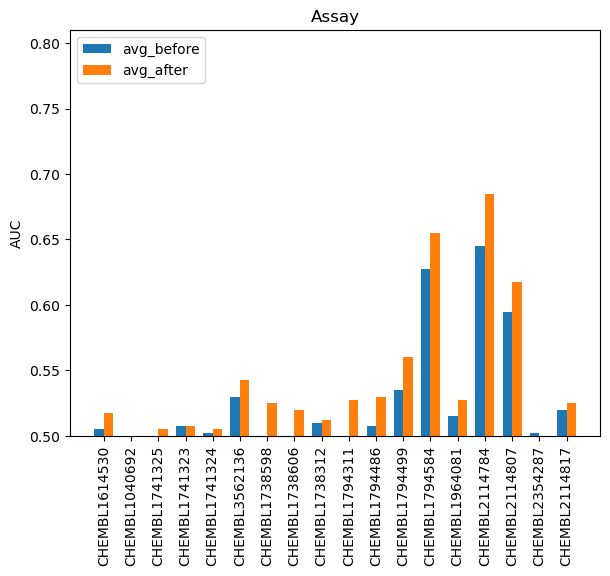

In [15]:
# Improvements for each assay 1
avg_before = np.mean([before_16, before_32, before_64, before_96], axis=0)
avg_after = np.mean([after_16, after_32, after_64, after_96], axis=0)
labels = list(df_proto_result['assay_chembl_id'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, avg_before, width, label='avg_before')
rects2 = ax.bar(x + width/2, avg_after, width, label='avg_after')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AUC')
ax.set_title('Assay')
ax.set_xticks(x, labels)
ax.legend(loc='upper left')

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.tick_params(axis='x', labelrotation=90)

plt.ylim([0.5, 0.81])

plt.show()

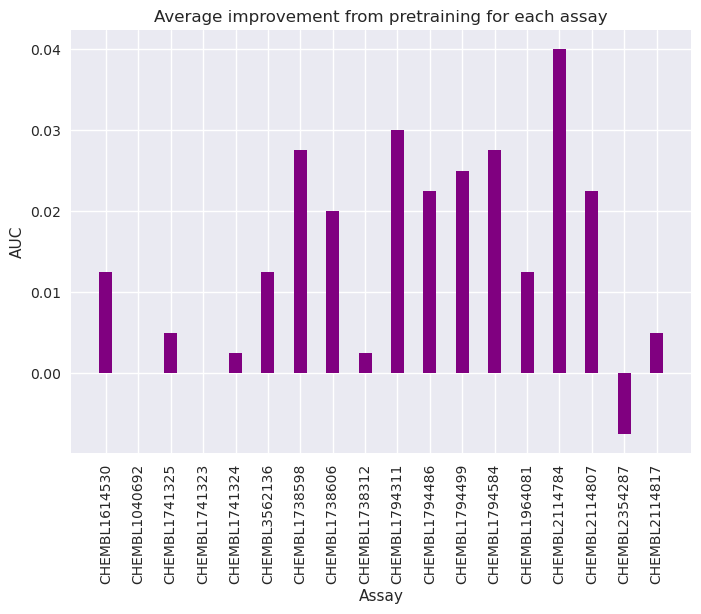

In [16]:
# Improvements for each assay 2

temp_df = pd.DataFrame({'assay':list(df_proto_result['assay_chembl_id']), 'improvement':list((diff_16 + diff_32 + diff_64 + diff_96)/4)})
#temp_df = temp_df.sort_values(by=['improvement'])

with plt.style.context(['seaborn-v0_8-deep', 'seaborn']):
    plt.bar(
            temp_df['assay'], 
            temp_df['improvement'], 
            width=0.4,
            color="purple"
        )
    plt.tick_params(axis='x', labelrotation=90)
    plt.xlabel('Assay')
    plt.ylabel('AUC')
    plt.title('Average improvement from pretraining for each assay')
    plt.show()

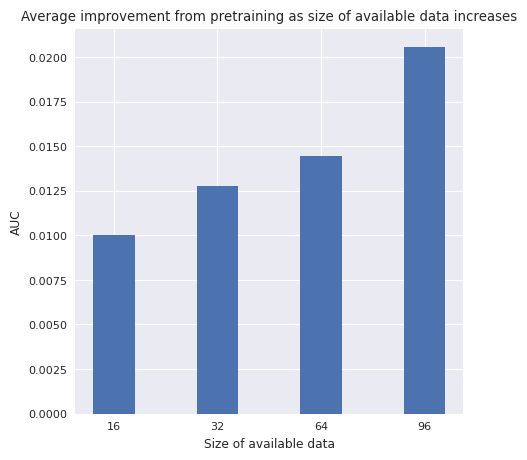

In [17]:
# Improvements from pretraining for various 'size of available data'

with plt.style.context(['seaborn', 'seaborn-paper']):
    plt.figure(figsize=(5, 5))
    plt.bar(
        ['16', '32', '64', '96'], 
        [np.mean(diff_16), np.mean(diff_32), np.mean(diff_64), np.mean(diff_96)], 
        width=0.4,
    )
    plt.xlabel('Size of available data')
    plt.ylabel('AUC')
    plt.title('Average improvement from pretraining as size of available data increases')
    plt.show()

In [18]:
# something like https://github.com/microsoft/FS-Mol/blob/main/baselines/plots/all_tasks/1613949.png
# comparing of methods for each task